   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

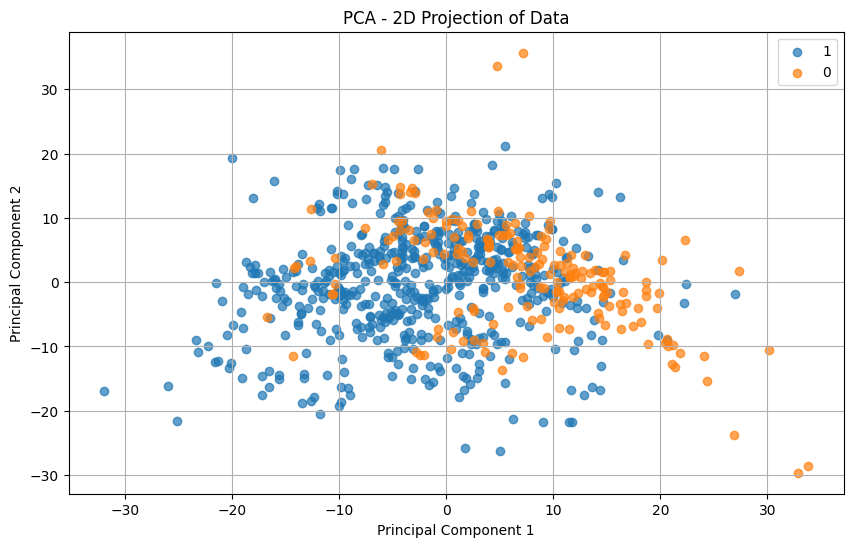

In [2]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
import pandas as pd 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore') 

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\pd_speech_features.csv")

# Hiển thị 5 dòng đầu tiên của dữ liệu
print(df.head())

# Xác định số lượng các lớp trong cột 'class'
print(df['class'].value_counts())

# Chia dữ liệu thành features và labels
X = df.drop(columns=['class'])  # features
y = df['class']                 # labels

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA để giảm số chiều xuống còn 2
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Tạo DataFrame mới từ dữ liệu sau PCA
df_2d = pd.DataFrame(data=X_2d, columns=['PC1', 'PC2'])
df_2d['class'] = y.values

# Hiển thị dữ liệu sau khi giảm chiều trên biểu đồ
plt.figure(figsize=(10, 6))
for class_label in df_2d['class'].unique():
    plt.scatter(df_2d[df_2d['class']==class_label]['PC1'], 
                df_2d[df_2d['class']==class_label]['PC2'], 
                label=class_label, alpha=0.7)

plt.title('PCA - 2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Giảm số chiều xuống còn 200 ứng với thành phần chính của dữ liệu bằng PCA nhằm phục vụ cho
việc phân loại dữ liệu (theo class), với phần dữ liệu Train gồm 500 bản ghi và dữ liệu kiểm tra là
phần còn lại. Dùng các công cụ đo độ chính xác để kiểm tra đánh giá mô hình.

In [2]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\pd_speech_features.csv")

# Chia dữ liệu thành features và labels
X = df.drop(columns=['class'])  # features
y = df['class']                 # labels

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA để giảm số chiều xuống còn 200
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=500, random_state=42)

# Xây dựng mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Báo cáo đánh giá chi tiết
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.79296875

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.54      0.60        72
           1       0.83      0.89      0.86       184

    accuracy                           0.79       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.78      0.79      0.79       256


Confusion Matrix:
[[ 39  33]
 [ 20 164]]


3) Lấy dữ liệu gốc và chia thành tập train:test như tỷ lệ trong ý 2), sau đó giảm chiều về 200 chiều cho
cả hai tập bằng PCA và thực hiện lại bài toán phân lớp dữ liệu. So sánh độ chính xác với ý 2).

In [9]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\pd_speech_features.csv")

# Chia dữ liệu thành features và labels
X = df.drop(columns=['class'])  # features
y = df['class']                 # labels

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, stratify=y, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Áp dụng PCA để giảm số chiều xuống còn 200
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Huấn luyện mô hình Logistic Regression trên tập train
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Dự đoán nhãn của dữ liệu test
y_pred = model.predict(X_test_pca)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác trên dữ liệu test sau khi giảm chiều về 200 chiều:", accuracy)


Độ chính xác trên dữ liệu test sau khi giảm chiều về 200 chiều: 0.828125


4) Thực hiện các yêu cầu sau
a. Hãy sử dụng phương phap PCA để đưa dữ liệu về số chiều nhỏ nhất sao cho lượng thông tin
được giữ lại ít nhất đạt 80%.
i. Cho biết dữ liệu mới còn bao nhiêu chiều.
ii. Thực hiện lại bài toán phân loại với tỷ lệ như trên, ứng với dữ liệu mới và so sánh độ chính
xác.

In [12]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\pd_speech_features.csv")

# Chia dữ liệu thành features và labels
X = df.drop(columns=['class'])  # features
y = df['class']                 # labels

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tìm số chiều nhỏ nhất sao cho lượng thông tin được giữ lại ít nhất đạt 80%
pca = PCA(0.8)
X_pca = pca.fit_transform(X_scaled)

# In số lượng chiều sau khi giảm
print("Số chiều mới sau khi giảm:", pca.n_components_)

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=500, stratify=y, random_state=42)

# Huấn luyện mô hình Logistic Regression trên tập train
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu test
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác trên dữ liệu test sau khi giảm chiều:", accuracy)


Số chiều mới sau khi giảm: 61
Độ chính xác trên dữ liệu test sau khi giảm chiều: 0.82421875



Sau khi giảm chiều dữ liệu xuống còn 200 chiều, độ chính xác trên dữ liệu test là khoảng 82.81%.
Số chiều mới sau khi giảm xuống là 61.
Sau khi giảm chiều dữ liệu sao cho lượng thông tin được giữ lại ít nhất đạt 80%, độ chính xác trên dữ liệu test là khoảng 82.42%.
Kết quả này cho thấy rằng, mặc dù số chiều được giảm còn ít hơn so với khi giảm xuống 200 chiều, độ chính xác của mô hình không có sự thay đổi lớn. Điều này cho thấy rằng chúng ta có thể giảm số chiều của dữ liệu một cách hiệu quả mà không ảnh hưởng nhiều đến hiệu suất của mô hình.

5) Sử dụng dữ liệu ban đầu, chia thành các tập Train- Test với tỷ lệ 4:2, sau đó áp dụng phương pháp
Naïve Bayes phù hợp và phương pháp Hồi quy Logistic để thực hiện bài toán phân loại (theo class).
Tiếp theo lại thực nghiệm các mô hình nói trên với dữ liệu đã giảm chiều ở ý b), cùng tỷ lệ chia như
trên. Hãy đánh giá xem 2 mô hình này, mô hình nào có độ chính xác thay đổi nhiều hơn.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import warnings 
warnings.filterwarnings('ignore')

# Đọc dữ liệu từ file CSV
df = pd.read_csv("D:\\Python\\MachineLearning\\MachineLearning\\week05\\data\\pd_speech_features.csv")

# Chia dữ liệu thành features và labels
X = df.drop(columns=['class'])  # features
y = df['class']                 # labels

# Chia dữ liệu thành tập train và test với tỷ lệ 4:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Huấn luyện mô hình Naïve Bayes trên dữ liệu gốc
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình Naïve Bayes trên dữ liệu gốc
nb_accuracy_original = accuracy_score(y_test, nb_model.predict(X_test))
print("Độ chính xác của mô hình Naïve Bayes trên dữ liệu gốc:", nb_accuracy_original)

# Huấn luyện mô hình Logistic Regression trên dữ liệu gốc
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình Logistic Regression trên dữ liệu gốc
lr_accuracy_original = accuracy_score(y_test, lr_model.predict(X_test))
print("Độ chính xác của mô hình Logistic Regression trên dữ liệu gốc:", lr_accuracy_original)

# Chuẩn hóa dữ liệu đã giảm chiều
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA để giảm chiều về 200 chiều
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)

# Chia dữ liệu đã giảm chiều thành tập train và test với tỷ lệ 4:2
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Huấn luyện mô hình Naïve Bayes trên dữ liệu đã giảm chiều
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train_pca)

# Đánh giá độ chính xác của mô hình Naïve Bayes trên dữ liệu đã giảm chiều
nb_accuracy_pca = accuracy_score(y_test_pca, nb_model_pca.predict(X_test_pca))
print("Độ chính xác của mô hình Naïve Bayes trên dữ liệu đã giảm chiều:", nb_accuracy_pca)

# Huấn luyện mô hình Logistic Regression trên dữ liệu đã giảm chiều
lr_model_pca = LogisticRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)

# Đánh giá độ chính xác của mô hình Logistic Regression trên dữ liệu đã giảm chiều
lr_accuracy_pca = accuracy_score(y_test_pca, lr_model_pca.predict(X_test_pca))
print("Độ chính xác của mô hình Logistic Regression trên dữ liệu đã giảm chiều:", lr_accuracy_pca)


Độ chính xác của mô hình Naïve Bayes trên dữ liệu gốc: 0.6897689768976898
Độ chính xác của mô hình Logistic Regression trên dữ liệu gốc: 0.7161716171617162
Độ chính xác của mô hình Naïve Bayes trên dữ liệu đã giảm chiều: 0.7062706270627063
Độ chính xác của mô hình Logistic Regression trên dữ liệu đã giảm chiều: 0.8316831683168316


Trên dữ liệu gốc, mô hình Logistic Regression có độ chính xác (71.62%) cao hơn so với mô hình Naïve Bayes (68.98%).
Trên dữ liệu đã giảm chiều, mô hình Logistic Regression có độ chính xác (83.17%) cao hơn mô hình Naïve Bayes (70.63%).
Điều này cho thấy rằng mô hình Logistic Regression thường cho kết quả tốt hơn so với mô hình Naïve Bayes trên cả dữ liệu gốc và dữ liệu đã giảm chiều. Đặc biệt, mô hình Logistic Regression có độ chính xác tăng lên một cách đáng kể khi áp dụng trên dữ liệu đã giảm chiều, trong khi độ chính xác của mô hình Naïve Bayes chỉ có sự thay đổi nhỏ. Điều này có thể cho thấy rằng mô hình Logistic Regression có khả năng học hỏi và tổng quát hóa tốt hơn trên dữ liệu đã được giảm chiều.